<a href="https://colab.research.google.com/github/packetech/baracuda/blob/master/SVHN_imgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

In [ ]:
# mount your drive to use the files on your notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Data Pre-processing**

In [ ]:
# importing the required packages and loading the .h5 type data file using the h5py package  
import h5py
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import seaborn as sns

In [ ]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]
# Close this file
h5f.close()

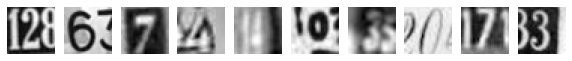

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

In [ ]:
# reshaping the data at hand
X_trainR = X_train.reshape(X_train.shape[0], 1024)
X_testR = X_test.reshape(X_test.shape[0], 1024)

print (X_trainR.shape)
print (X_testR.shape)

(42000, 1024)
(18000, 1024)


In [ ]:
# normalize inputs from 0-255 to 0-1 (we will use the unnormalised (X_train and X_test) for our NN it will still converge though slowly)
X_trainR = X_trainR / 255.0
X_testR = X_testR / 255.0

y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

print (X_trainR.shape)
print (X_testR.shape)

print(y_train.shape)
print(y_test.shape)

(42000, 1024)
(18000, 1024)
(42000, 10)
(18000, 10)


In [ ]:
# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())



In [ ]:
# 2000 samples to be used in knn modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]


**Building a simple KNN Classidier**

In [ ]:
## KNN with optimal Hyperparameters

#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)

In [ ]:
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [ ]:
## wrapping up the modelling with time calculations to test the computational efficiency
import time
start_time = time.time()

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

#Learning
model1.fit(x_tr,y_tr)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(x_te)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_te))

m = (time.time() - start_time)/60
print("--- %s minutes ---" % m )


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.331
--- 39.90444188912709 minutes ---


Confusion Matrix


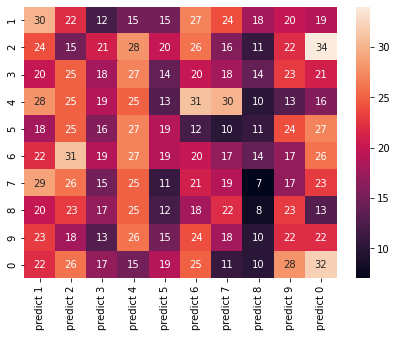

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_tr, prediction, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","2","3","4","5","6","7","8","9","0"]],
                  columns = [i for i in ["predict 1","predict 2","predict 3","predict 4","predict 5","predict 6","predict 7","predict 8","predict 9","predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

From Observation: The true positive for image 10 which is label 0 and predict 0 is the highest (at 32) and 8 is the list (at 8)

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_te, prediction, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.37      0.47      0.41       185
           2       0.29      0.37      0.33       187
           3       0.20      0.18      0.19       185
           4       0.40      0.47      0.43       204
           5       0.33      0.25      0.28       211
           6       0.27      0.30      0.29       202
           7       0.49      0.44      0.47       205
           8       0.26      0.15      0.19       198
           9       0.26      0.27      0.27       202
           0       0.38      0.40      0.39       221

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.33      0.33      2000



The KNN performed more on threee numbers which are 7, 4 and 1 (which have higher f-scores, hence higher precisions on those numbers)
However the main observer is:

**Observation**

KNN accuracy is 33.1% and it took 39.9 minutes to fit the model

The accuracy is very poor (that means it is not able to correctly identify 66.9% of the images, which is so much)

**Neural Network Classification of the same images**

In [ ]:
import tensorflow as tf


In [ ]:
# 1. Build the Graph
#Initialize Sequential model
model = tf.keras.models.Sequential()
 

#Reshape data from 2D to 1D -> 32x32 to 1024 (since it's an RGB image)
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# 2. Build the Graph
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 3. Build the Graph
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 117,816
Trainable params: 115,768
Non-trainable params: 2,048
____________________________________________

In [ ]:
## Fitting the model plus a time wrapper for measurement
# Initializing time
import time
start_time2 = time.time()

# Train the model
# I had the error below when i normalize inputs from 0-255 to 0-1
# ValueError: Error when checking input: expected reshape_4_input to have 3 dimensions, but got array with shape (42000, 1024)
# For now i couldn't figure out how to solve that problem so i used un-normalised inputs

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

#Stopping and printing out the stop time
min = (time.time() - start_time2)/60
print("--- %s minutes ---" % min )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 143us/sample - loss: 1.7639 - acc: 0.3766 - val_loss: 1.3772 - val_acc: 0.5422
Epoch 2/20
42000/42000 [==============================] - 6s 134us/sample - loss: 1.1985 - acc: 0.6122 - val_loss: 1.0192 - val_acc: 0.6857
Epoch 3/20
42000/42000 [==============================] - 6s 135us/sample - loss: 1.0095 - acc: 0.6791 - val_loss: 0.9263 - val_acc: 0.7186
Epoch 4/20
42000/42000 [==============================] - 6s 133us/sample - loss: 0.9153 - acc: 0.7135 - val_loss: 0.8390 - val_acc: 0.7474
Epoch 5/20
42000/42000 [==============================] - 6s 131us/sample - loss: 0.8517 - acc: 0.7330 - val_loss: 0.8593 - val_acc: 0.7427
Epoch 6/20
42000/42000 [==============================] - 5s 131us/sample - loss: 0.8078 - acc: 0.7480 - val_loss: 0.7419 - val_acc: 0.7809
Epoch 7/20
42000/42000 [==============================] - 5s 128us/sample - loss: 0.7647 - acc: 0.7625 - val_l

**OBSERVATION**

With a training accuracy of 82.4% and validation or test accuracy of 81.6% as well as a computational time of 1.86 minutes

Clearly Neural Network is computationally more efficient with a far better accuracy